In [1]:
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import autoreload
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.models import load_model
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
data = pickle.load(open('cleaned_training.p', 'rb'))

In [3]:
from data_functions import create_training_data

In [4]:
X, Y_root, Y_vowel, Y_consonant = create_training_data(data)

In [5]:
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X, Y_root, Y_vowel, Y_consonant, test_size=0.05, random_state=42)
y_train = [y_train_root, y_train_vowel, y_train_consonant]
y_test = [y_test_root, y_test_vowel, y_test_consonant]

In [6]:
class_map_df = pd.read_csv('data/class_map.csv')

In [7]:
from create_models import ModelEvaluation

In [8]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.2)(model)

model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Conv2D(filters=128, kernel_size= (5,5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.2)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [9]:
mymodel= ModelEvaluation(model)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [10]:
mymodel.train(x_train, y_train, epochs= 20, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/20
171718/171718 [==============================] - 253s 1ms/step - loss: 5.7439 - dense_3_loss: 3.9768 - dense_4_loss: 0.9651 - dense_5_loss: 0.8013 - dense_3_accuracy: 0.0995 - dense_4_accuracy: 0.6815 - dense_5_accuracy: 0.7371 - val_loss: 3.5271 - val_dense_3_loss: 2.6655 - val_dense_4_loss: 0.4808 - val_dense_5_loss: 0.3817 - val_dense_3_accuracy: 0.2842 - val_dense_4_accuracy: 0.8348 - val_dense_5_accuracy: 0.8714
Epoch 2/20
171718/171718 [==============================] - 244s 1ms/step - loss: 2.4834 - dense_3_loss: 1.8227 - dense_4_loss: 0.3612 - dense_5_loss: 0.2992 - dense_3_accuracy: 0.4751 - dense_4_accuracy: 0.8782 - dense_5_accuracy: 0.9000 - val_loss: 1.2708 - val_dense_3_loss: 0.8916 - val_dense_4_loss: 0.2014 - val_dense_5_loss: 0.1790 - val_dense_3_accuracy: 0.7348 - val_dense_4_accuracy: 0.9344 - val_dense_5_accuracy: 0.9437
Epoch 3/20
171718/171718 [==============================] - 244s 1ms/step - loss: 1.3

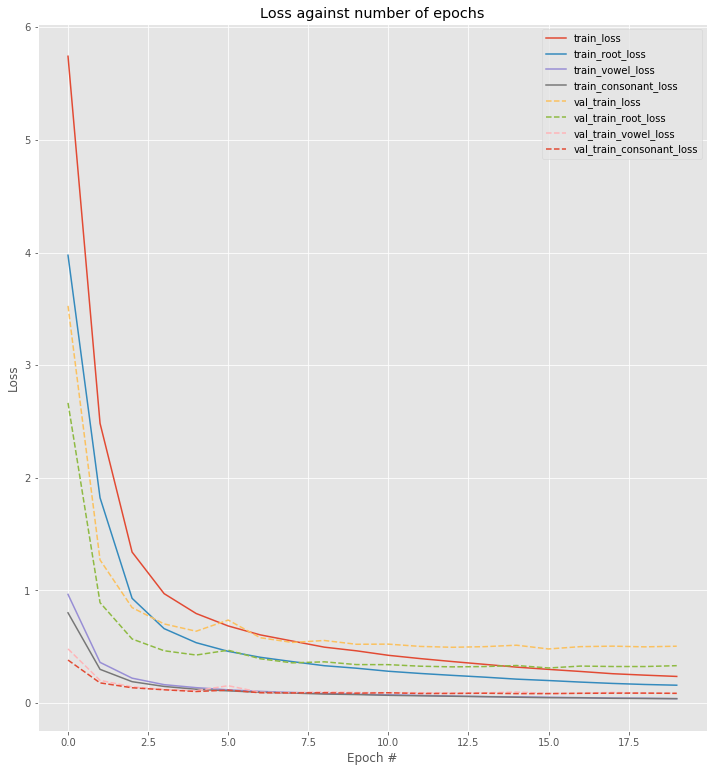

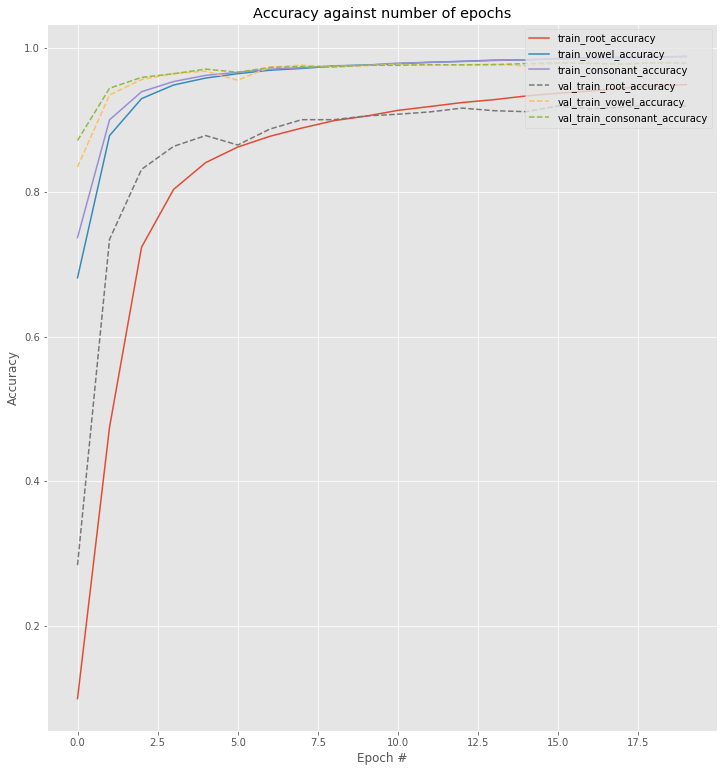

In [11]:
mymodel.plot_metrics()

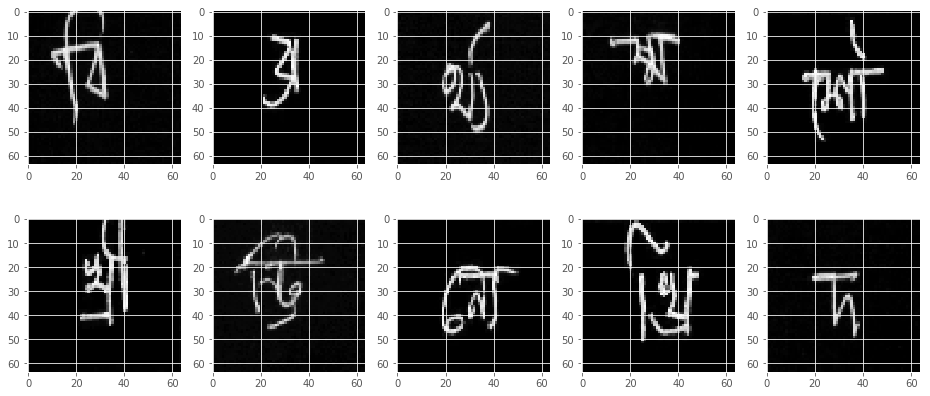

predicted                                      true               \
             root r_comp vowel v_comp consonant c_comp root r_comp vowel   
image_0       107      ব     2      ি         0      0  107      ব     2   
image_1       107      ব     0      0         5     ্র  107      ব     0   
image_2        71      থ     0      0         3    র্য   71      থ     0   
image_3       146    ষ্ম     0      0         0      0  146    ষ্ম     0   
image_4       133      শ    10      ৌ         0      0  133      শ    10   
image_5        22      খ     3      ী         5     ্র   22      খ     3   
image_6        83    ন্ট     2      ি         5     ্র   83    ন্ট     2   
image_7        81      ন     7      ে         4     ্য   81      ন     7   
image_8        22      খ     2      ি         5     ্র   22      খ     2   
image_9        72      দ     0      0         0      0   72      দ     0   

                                 
        v_comp consonant c_comp  
image_0      ি         0      0  
image_1      0         5     ্র  
image_2      0         3    র্য  
image_3      0         0      0  
image_4      ৌ         0      0  
image_5      ী         5     ্র  
image_6      ি         5     ্র  
image_7      ে         4     ্য  
image_8      ি         5     ্র  
image_9      0         0      0

In [12]:
mymodel.test(class_map_df, x_test, y_test, 10)

In [13]:
mymodel.evaluation(x_test, y_test)

10042/10042 [==============================] - 7s 731us/step
[('loss', 0.48649813937276654), ('dense_3_loss', 0.3130292594432831), ('dense_4_loss', 0.08786999434232712), ('dense_5_loss', 0.08592486381530762), ('dense_3_accuracy', 0.9215295910835266), ('dense_4_accuracy', 0.9800836443901062), ('dense_5_accuracy', 0.9783907532691956)]


In [14]:
mymodel.save_model()

In [8]:
# initial model
model= load_model('model_1.h5')
hist = pickle.load(open('model_1_history.p', 'rb'))

In [9]:
mymodel= ModelEvaluation(model, hist)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 64, 64, 32)   128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 32)   0           batch_normalization_2[0][0]      
____________________________________________________________________________________________

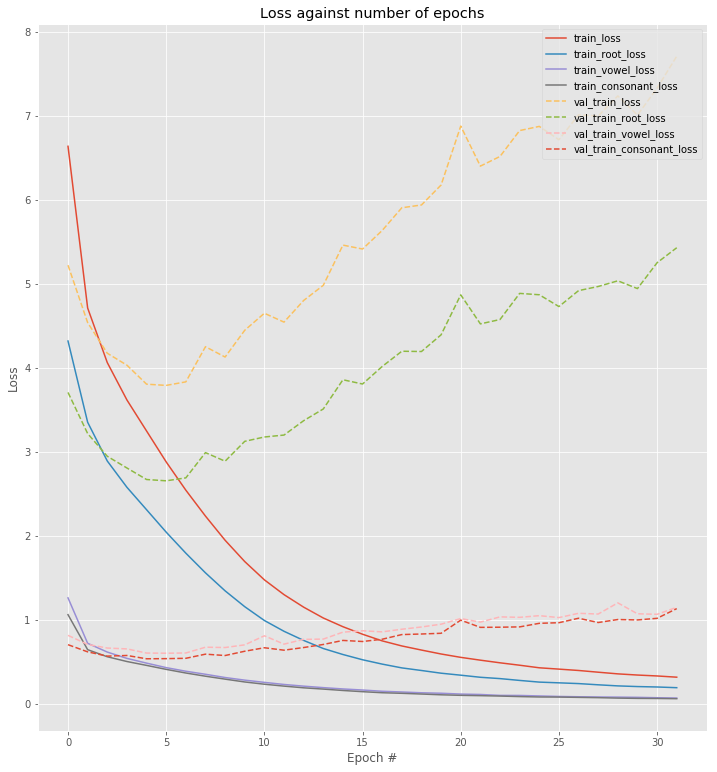

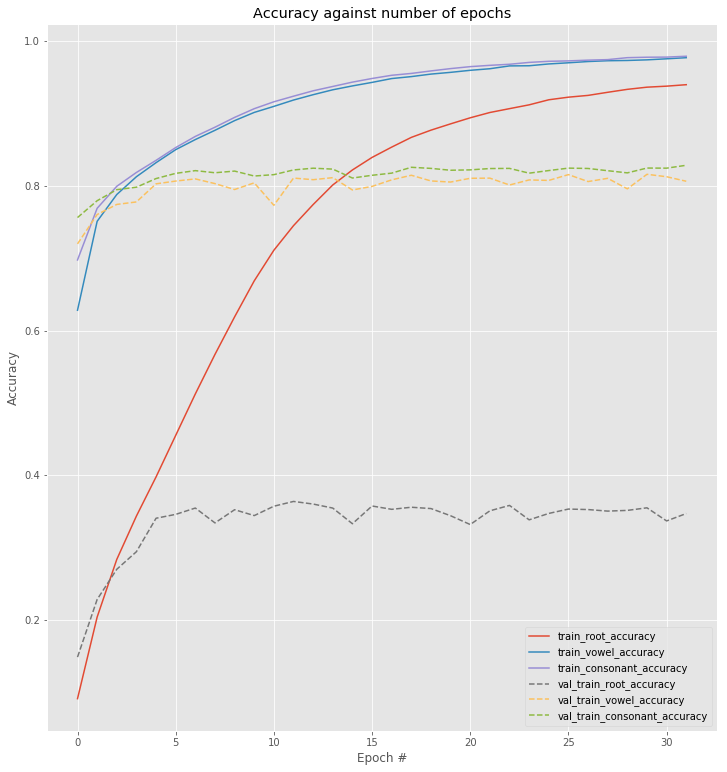

In [10]:
mymodel.plot_metrics()

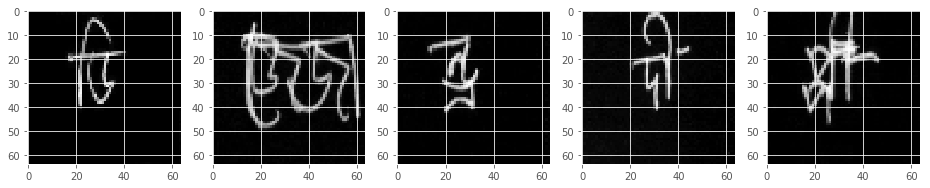

predicted                                      true               \
             root r_comp vowel v_comp consonant c_comp root r_comp vowel   
image_0        56      ড     2      ি         0      0   56      ড     2   
image_1        16    ক্ত     9      ো         0      0   44    জ্জ     9   
image_2        89    ন্দ     0      0         5     ্র   85    ন্ড     0   
image_3        72      দ     3      ী         0      0   72      দ     3   
image_4       120    ম্ম     3      ী         0      0  100    প্প     3   

                                 
        v_comp consonant c_comp  
image_0      ি         0      0  
image_1      ো         0      0  
image_2      0         5     ্র  
image_3      ী         0      0  
image_4      ী         0      0

In [11]:
mymodel.test(class_map_df, x_test, y_test, 5)

In [12]:
mymodel.evaluation(x_test, y_test)

10042/10042 [==============================] - 5s 478us/step
[('loss', 7.5849116761664), ('dense_6_loss', 5.39757776260376), ('dense_7_loss', 1.1051106452941895), ('dense_8_loss', 1.0843908786773682), ('dense_6_accuracy', 0.3494323790073395), ('dense_7_accuracy', 0.8118900656700134), ('dense_8_accuracy', 0.8322047591209412)]


In [16]:
model= load_model('model_8.h5')
hist = pickle.load(open('model_8_history.p', 'rb'))

In [17]:
mymodel_best = ModelEvaluation(model, hist)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_2[0][0]                   
____________________________________________________________________________________________

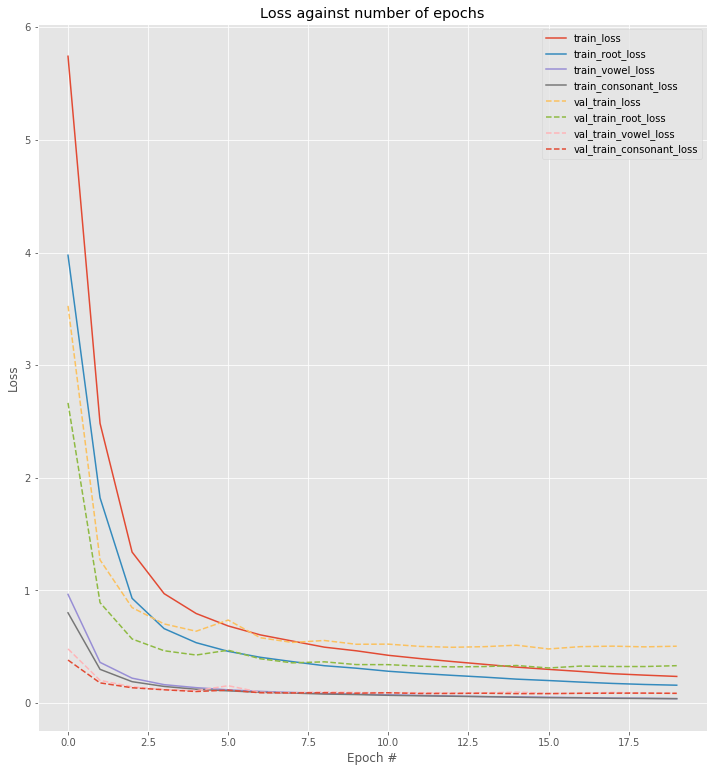

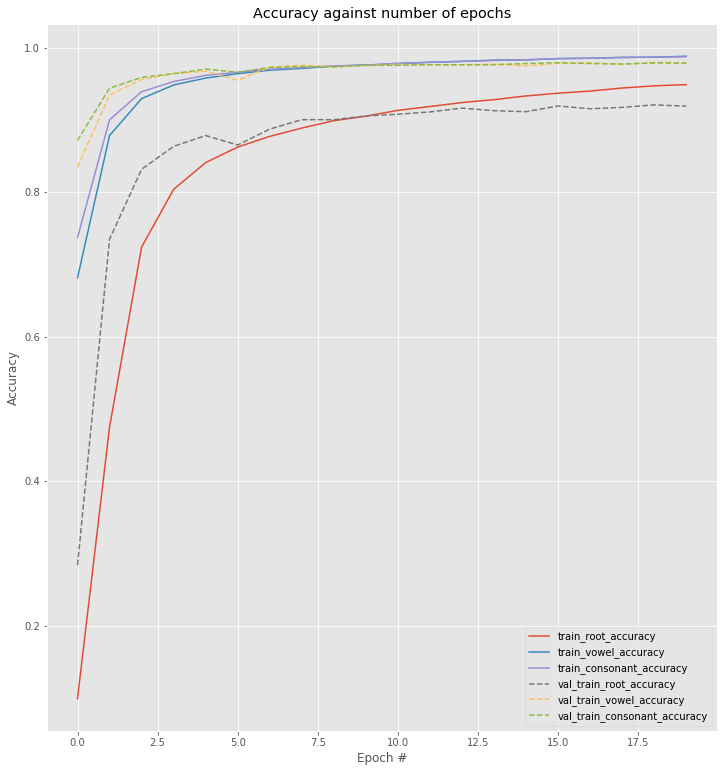

In [18]:
mymodel_best.plot_metrics()

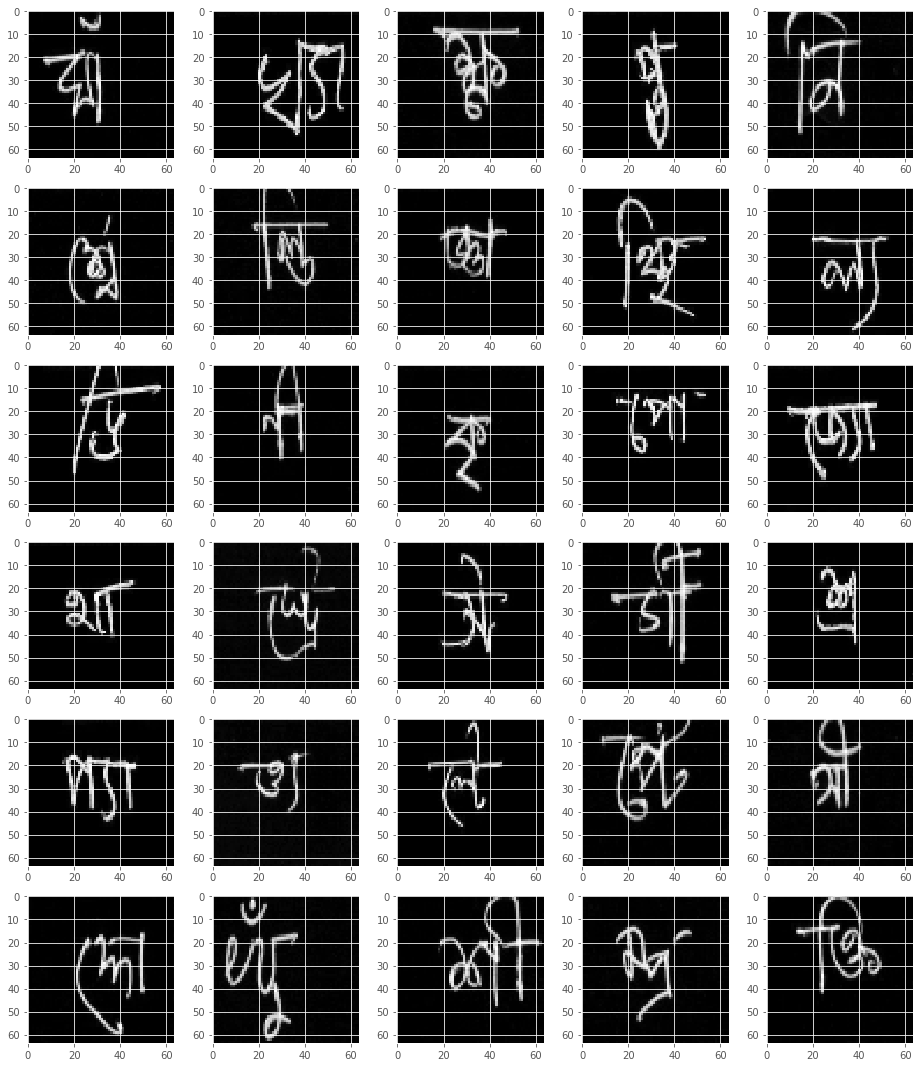

predicted                                      true               \
              root r_comp vowel v_comp consonant c_comp root r_comp vowel   
image_0         29      ঘ     1      া         1      ঁ   29      ঘ     1   
image_1         22      খ     1      া         4     ্য   22      খ     1   
image_2         19  ক্ষ্ণ     0      0         0      0   19  ক্ষ্ণ     0   
image_3         98    প্ত     0      0         0      0   98    প্ত     0   
image_4         81      ন     2      ি         0      0   81      ন     2   
image_5        136    শ্ব     7      ে         2     র্  136    শ্ব     7   
image_6        128    ল্ড     2      ি         0      0  128    ল্ড     2   
image_7         46    জ্ঞ     1      া         0      0   46    জ্ঞ     1   
image_8         51    ঞ্ছ     2      ি         0      0   51    ঞ্ছ     2   
image_9        124      ল     0      0         4     ্য  124      ল     0   
image_10        54    ট্ট     2      ি         0      0   31      ঙ     2   
image_11        59      ণ     3      ী         0      0   59      ণ     3   
image_12        13      ক     6      ৃ         0      0   13      ক     6   
image_13        96      প     9      ো         0      0   96      প     9   
image_14        43      জ     9      ো         4     ্য   43      জ     9   
image_15        71      থ     1      া         0      0   71      থ     1   
image_16       149    স্ট     7      ে         5     ্র  149    স্ট     7   
image_17       149    স্ট     0      0         0      0  149    স্ট     0   
image_18        23      গ     3      ী         2     র্   23      গ     3   
image_19       133      শ     0      0         5     ্র  133      শ     0   
image_20        96      প     1      া         4     ্য   96      প     1   
image_21        65    ত্ত     0      0         4     ্য   65    ত্ত     0   
image_22       127    ল্ট     7      ে         0      0  127    ল্ট     7   
image_23        97    প্ট     7      ে         0      0   97    প্ট     7   
image_24        71      থ     3      ী         0      0  147      স     3   
image_25        74    দ্দ     9      ো         0      0   74    দ্দ     9   
image_26        22      খ     4      ু         1      ঁ   22      খ     4   
image_27       133      শ     3      ী         0      0  133      শ     3   
image_28       117    ম্প     0      0         5     ্র  117    ম্প     0   
image_29        16    ক্ত     2      ি         0      0   16    ক্ত     2   

                                  
         v_comp consonant c_comp  
image_0       া         1      ঁ  
image_1       া         4     ্য  
image_2       0         0      0  
image_3       0         0      0  
image_4       ি         0      0  
image_5       ে         2     র্  
image_6       ি         0      0  
image_7       া         0      0  
image_8       ি         0      0  
image_9       0         4     ্য  
image_10      ি         0      0  
image_11      ী         0      0  
image_12      ৃ         0      0  
image_13      ো         0      0  
image_14      ো         4     ্য  
image_15      া         0      0  
image_16      ে         5     ্র  
image_17      0         0      0  
image_18      ী         2     র্  
image_19      0         5     ্র  
image_20      া         4     ্য  
image_21      0         4     ্য  
image_22      ে         0      0  
image_23      ে         0      0  
image_24      ী         0      0  
image_25      ো         0      0  
image_26      ু         1      ঁ  
image_27      ী         0      0  
image_28      0         5     ্র  
image_29      ি         0      0

In [24]:
mymodel_best.test(class_map_df, x_test, y_test, 30)

In [21]:
mymodel_best.evaluation(x_test, y_test)

10042/10042 [==============================] - 8s 807us/step
[('loss', 0.48649813740216885), ('dense_3_loss', 0.3130292594432831), ('dense_4_loss', 0.08786999434232712), ('dense_5_loss', 0.08592486381530762), ('dense_3_accuracy', 0.9215295910835266), ('dense_4_accuracy', 0.9800836443901062), ('dense_5_accuracy', 0.9783907532691956)]
